In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [9]:
df = pd.read_csv("Loan.csv")

In [10]:
# Удаление неинформативных признаков
df.drop(columns=["ApplicationDate", "LengthOfCreditHistory", "CreditScore"], inplace=True)

In [11]:
# Кодирование категориальных переменных
from sklearn.preprocessing import LabelEncoder

cat_vars = ["EmploymentStatus", "EducationLevel", "MaritalStatus", "HomeOwnershipStatus", "LoanPurpose"]

encoder = LabelEncoder()
for column in cat_vars:
    df[column] = encoder.fit_transform(df[column])
df[cat_vars]

,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
0,0,4,1,2,3
1,0,0,2,0,1
2,0,1,1,3,2
3,0,3,2,0,3
4,0,0,1,0,1
...,...,...,...,...,...
19995,0,3,1,3,0
19996,0,0,1,3,1
19997,0,1,1,0,3
19998,0,3,1,2,1


In [12]:
from scipy.stats import jarque_bera

# Построение признака с описательными статистиками 
def descr_features(data):
    features = data.dtypes.to_frame(name="data_type")  # Тип данных в столбце
    features["n_NaN"] = data.isna().sum()  # Количество пропущенных значений
    features["%NaN"] = round(features["n_NaN"] / len(data) * 100, 2)  # Процент пропущенных значений
    features["nunique"] = data.nunique().values  # Количество уникальных значений

    # Информация describe()
    describe_df = data.describe(include="all").round(1).T
    features = pd.merge(features, describe_df.round(0), how="left", left_index=True, right_index=True)
    
    # Добавляем статистику Жарка-Берра и вероятность
    jarque_bera_stats = []
    jarque_bera_pvalues = []
    for col in data.select_dtypes(include=["float64", "int64"]).columns:  # Только для числовых данных
        stat, p = jarque_bera(data[col].dropna())
        jarque_bera_stats.append(stat)
        jarque_bera_pvalues.append(p)
    
    # Приводим значения к float перед добавлением
    features["Jarque-Bera"] = 0.0  # Указываем явный тип float
    features["p-value"] = 0.0
    features.loc[data.select_dtypes(include=["float64", "int64"]).columns, "Jarque-Bera"] = jarque_bera_stats
    features.loc[data.select_dtypes(include=["float64", "int64"]).columns, "p-value"] = jarque_bera_pvalues

    return features

# Пример вызова
descr = descr_features(df)
descr

,data_type,n_NaN,%NaN,nunique,count,mean,std,min,25%,50%,75%,max,Jarque-Bera,p-value
Age,int64,0,0.0,63,20000.0,40.0,12.0,18.0,32.0,40.0,48.0,80.0,1.957587e+02,3.101199e-43
AnnualIncome,int64,0,0.0,17516,20000.0,59162.0,40351.0,15000.0,31679.0,48566.0,74391.0,485341.0,5.363979e+04,0.000000e+00
EmploymentStatus,int32,0,0.0,3,20000.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.000000e+00,0.000000e+00
EducationLevel,int32,0,0.0,5,20000.0,2.0,1.0,0.0,1.0,1.0,3.0,4.0,0.000000e+00,0.000000e+00
Experience,int64,0,0.0,62,20000.0,18.0,11.0,0.0,9.0,17.0,25.0,61.0,5.000017e+02,2.666897e-109
LoanAmount,int64,0,0.0,15578,20000.0,24883.0,13427.0,3674.0,15575.0,21914.0,30835.0,184732.0,4.936154e+04,0.000000e+00
LoanDuration,int64,0,0.0,10,20000.0,54.0,25.0,12.0,36.0,48.0,72.0,120.0,1.437115e+03,0.000000e+00
MaritalStatus,int32,0,0.0,4,20000.0,1.0,1.0,0.0,1.0,1.0,2.0,3.0,0.000000e+00,0.000000e+00
NumberOfDependents,int64,0,0.0,6,20000.0,2.0,1.0,0.0,0.0,1.0,2.0,5.0,1.561893e+03,0.000000e+00
HomeOwnershipStatus,int32,0,0.0,4,20000.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,0.000000e+00,0.000000e+00


### Анализ распределения целевого признака 

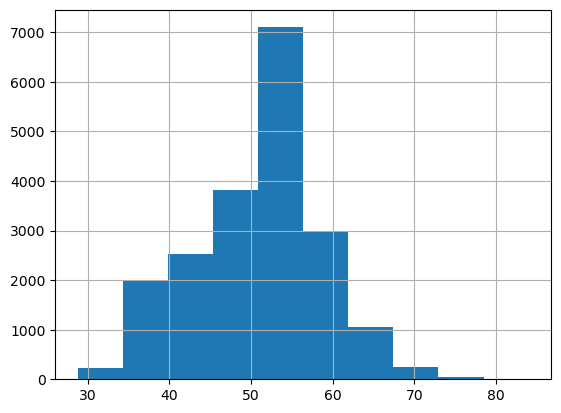

In [14]:
df["RiskScore"].hist(bins=10);

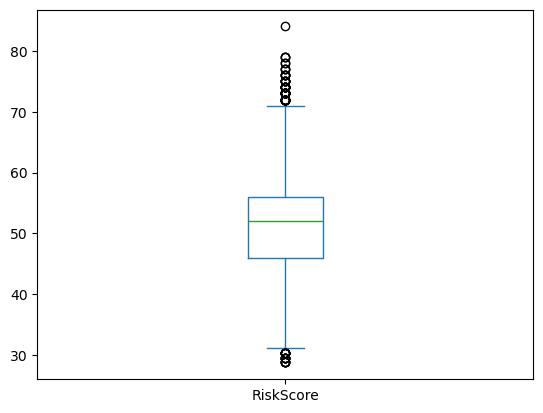

In [15]:
df["RiskScore"].plot(kind="box");

### Анализ экзогенных переменных

In [17]:
# Отделяем эндогенную переменную
y = df["RiskScore"]
df.drop(columns=["RiskScore"], inplace=True)

In [19]:
# Группируем переменные
cat_vars.append("NumberOfDependents")
bin_vars = descr[descr["nunique"]==2].index.to_list()
uniform = ["NumberOfCreditInquiries", "NumberOfOpenCreditLines", "MonthlyDebtPayments"]
upto0 = ["AnnualIncome", "LoanAmount", "SavingsAccountBalance", "CheckingAccountBalance", "TotalAssets", "TotalLiabilities", "NetWorth"]
contin = df.select_dtypes(include="float").columns.to_list()
discr = df.select_dtypes(include="int").drop(columns=cat_vars+bin_vars+upto0+uniform).columns.to_list()

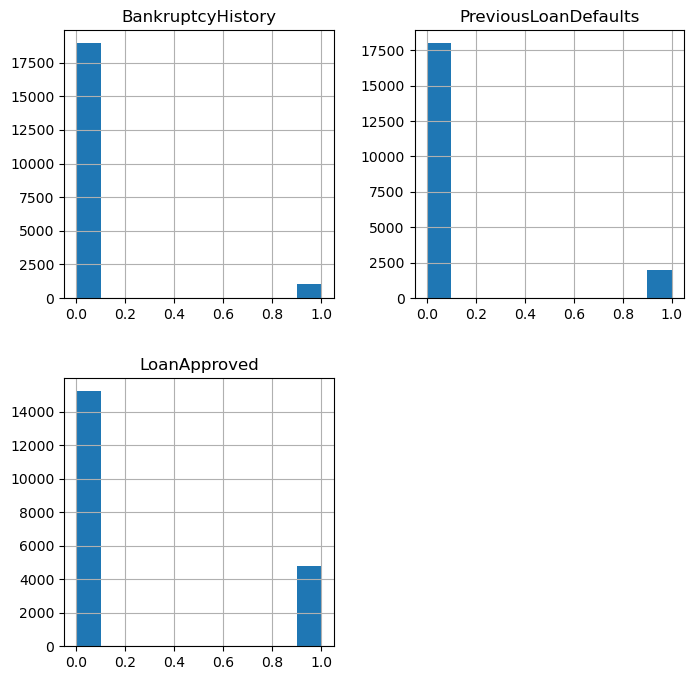

In [20]:
df[bin_vars].hist(figsize=(8,8));

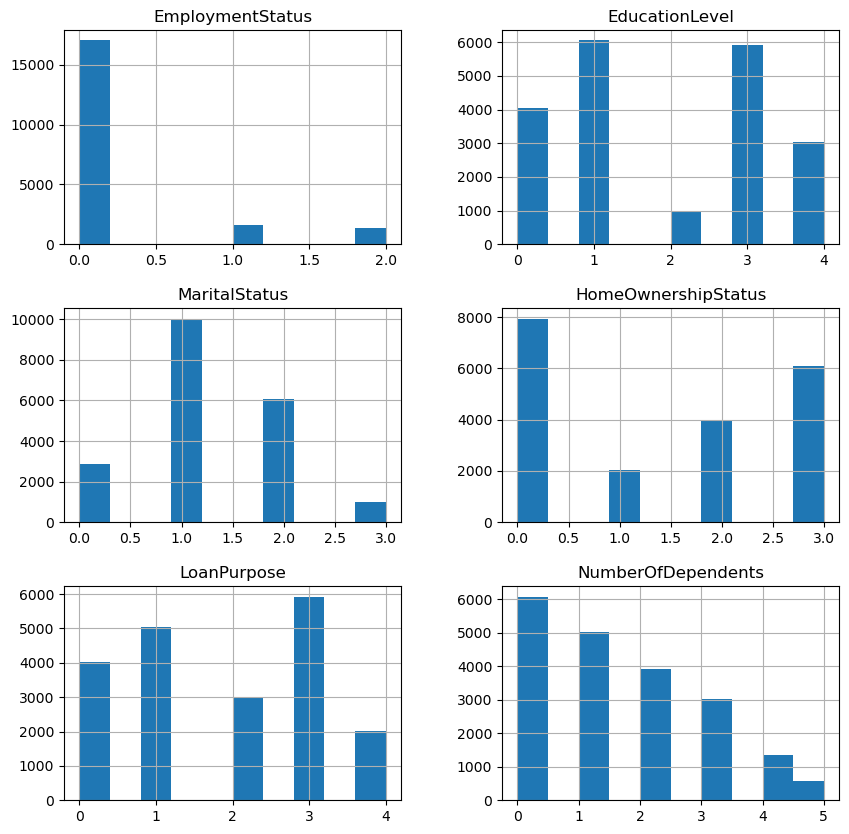

In [21]:
df[cat_vars].hist(figsize=(10, 10));

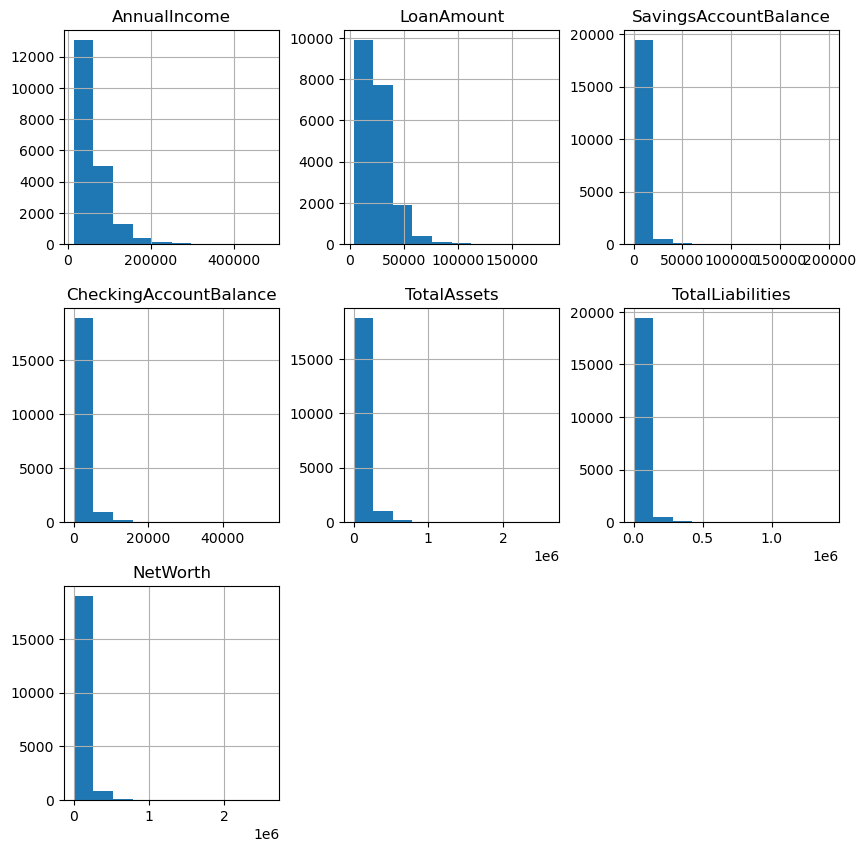

In [22]:
df[upto0].hist(figsize=(10, 10));

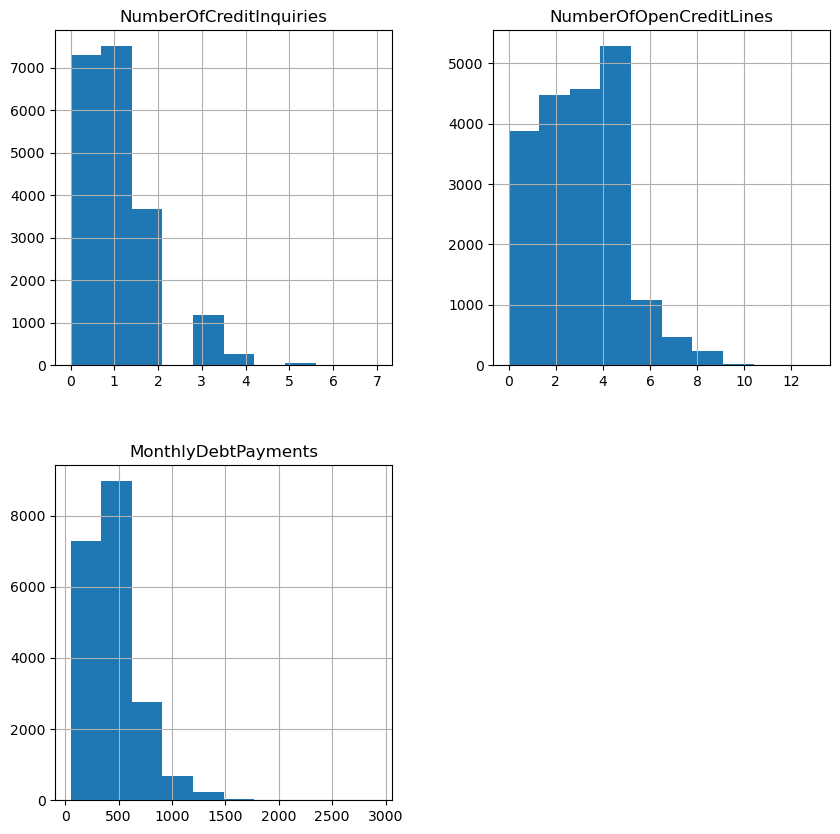

In [23]:
df[uniform].hist(figsize=(10, 10));

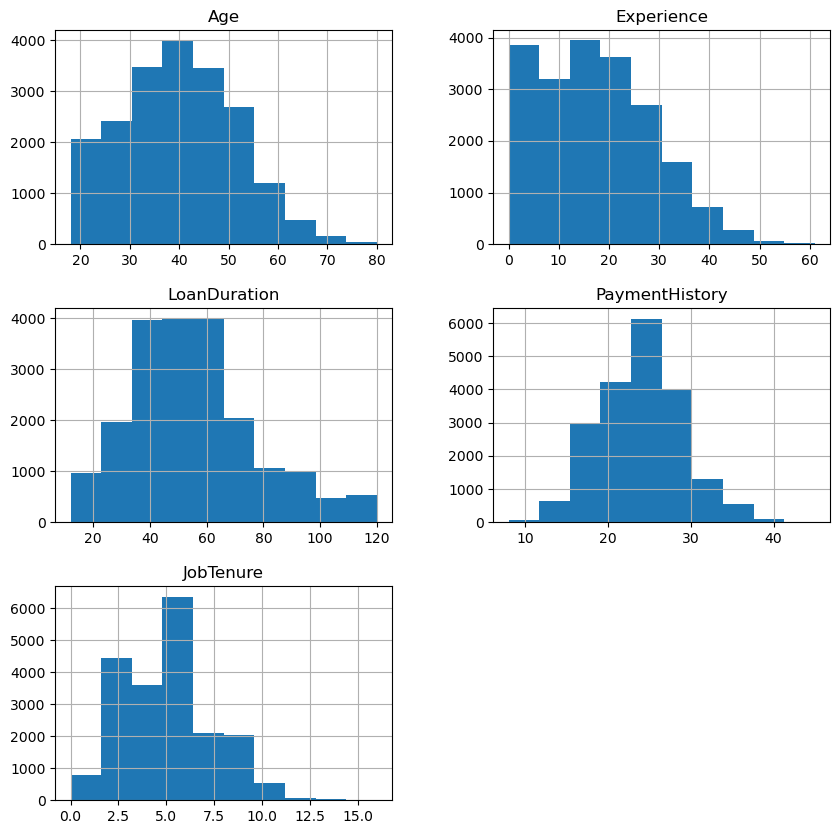

In [24]:
df[discr].hist(figsize=(10, 10), bins=10);

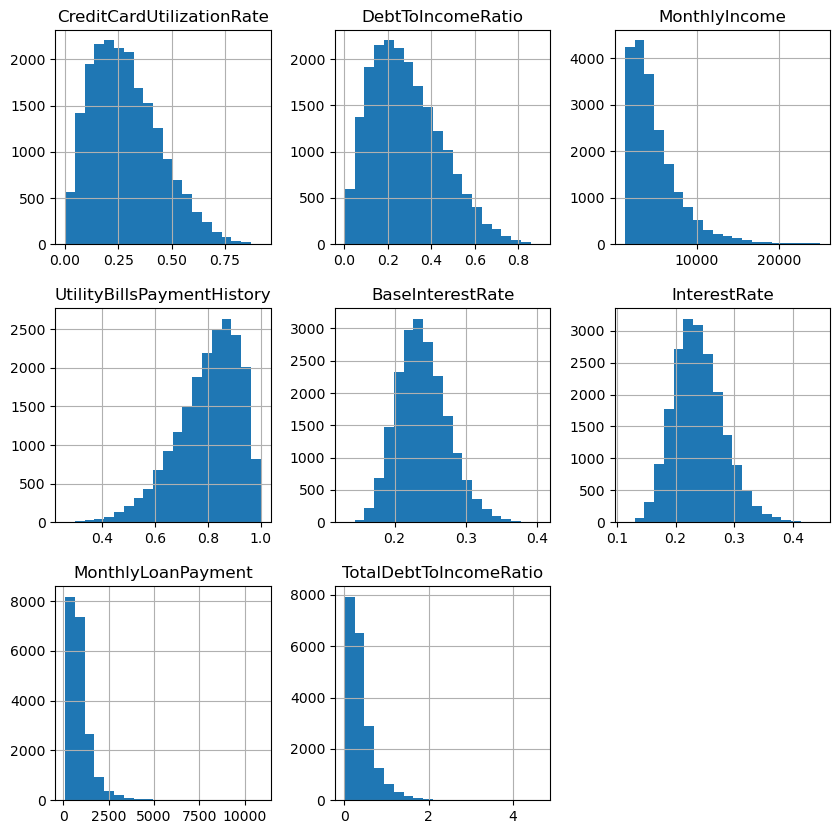

In [25]:
df[contin].hist(figsize=(10,10), bins=20);

In [26]:
from sklearn.preprocessing import PowerTransformer

# Определяем числовые признаки (исключая категориальные и бинарные)
numerical_vars = [col for col in df.columns if col not in bin_vars]

# Инициализация PowerTransformer для Box-Cox
boxcox_transformer = PowerTransformer(method='box-cox')

# Применение Box-Cox преобразования (все значения должны быть > 0)
df[numerical_vars] = boxcox_transformer.fit_transform(df[numerical_vars] + 1e-6)  # Добавляем небольшое смещение для избегания нулей

df["RiskScore"] = y

# Выделяем целевой признак RiskScore
target_transformer = PowerTransformer(method='box-cox')

# Преобразование целевого признака RiskScore
df["RiskScore"] = df["RiskScore"] + 1e-6  # Добавляем небольшое смещение для избегания нулевых значений
df["RiskScore"] = target_transformer.fit_transform(df[["RiskScore"]])  # Преобразуем целевой признак

print("Данные после Box-Cox преобразования:")
df.head()

Данные после Box-Cox преобразования:


,Age,AnnualIncome,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,0.484794,-0.304973,-0.417114,0.925656,0.514280,-1.014110,-0.126998,0.046246,0.662490,0.786380,...,-0.298783,-0.769897,2.279325,1.023320,-1.152175,-0.197459,-0.952030,-0.681992,0,-0.253885
1,-0.104767,-0.315040,-0.417114,-1.878200,0.092240,0.345455,-0.126998,0.776441,0.405017,-1.229251,...,-0.308878,1.278365,-0.851421,0.266984,-0.902463,-0.899403,0.135815,0.330170,0,0.133501
2,0.647961,-0.272738,-0.417114,0.024627,0.719304,-0.430127,-0.675359,0.046246,0.662490,0.885702,...,-0.266455,0.558412,0.506917,-1.165874,-0.561312,-0.585488,-0.154191,0.555565,0,0.133501
3,1.510532,0.588498,-0.417114,0.709508,1.078164,1.087493,1.548892,0.776441,0.405017,-1.229251,...,0.598520,0.820713,0.091419,0.848424,1.612117,1.400518,0.580682,0.040153,0,0.396070
4,-0.191594,1.213159,-0.417114,-1.878200,0.223213,-1.732758,-0.675359,0.046246,0.405017,-1.229251,...,1.227469,1.355143,0.091419,1.445498,-1.237767,-1.650051,-1.386399,-1.924078,1,-1.834972


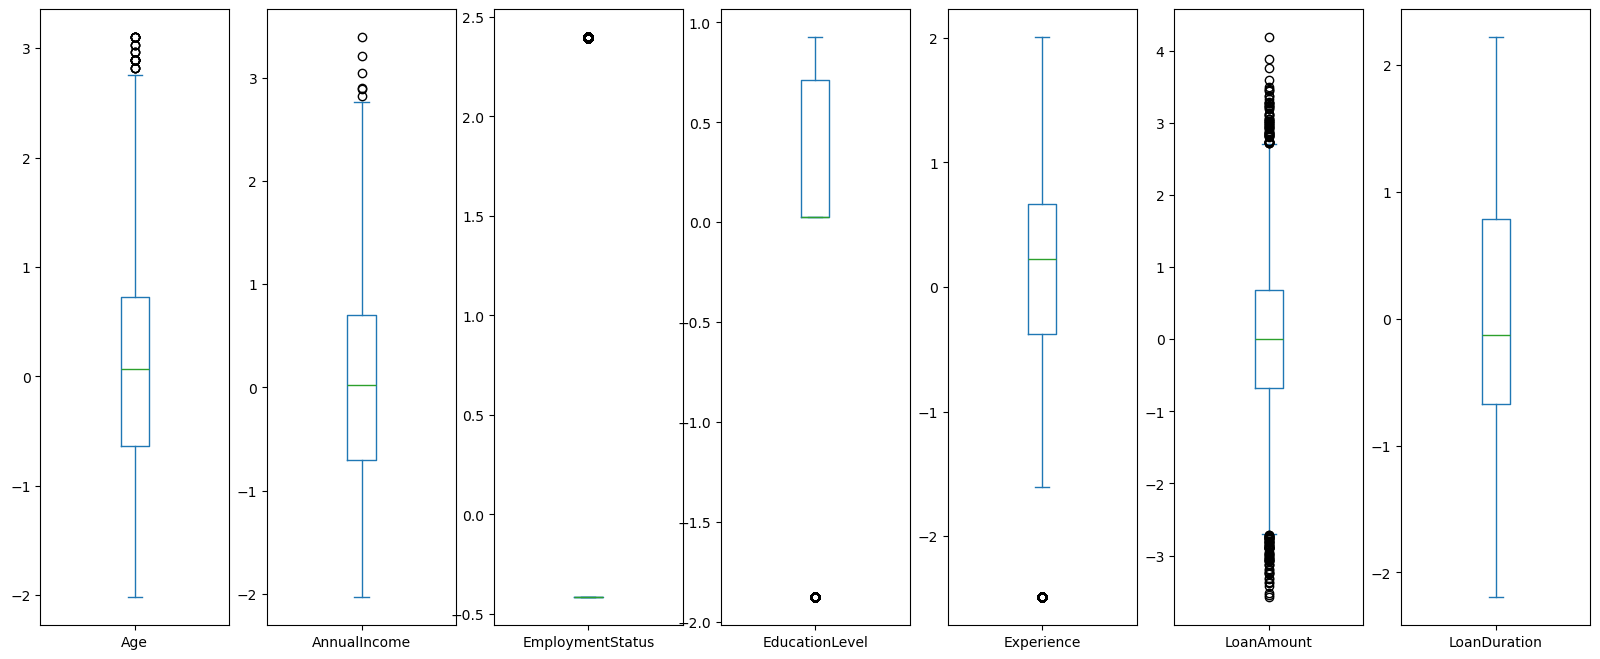

In [27]:
# Обнаружение выбросов
df.iloc[:, :7].plot(kind="box", sharex=False, subplots=True, figsize=(20,8))
plt.show()

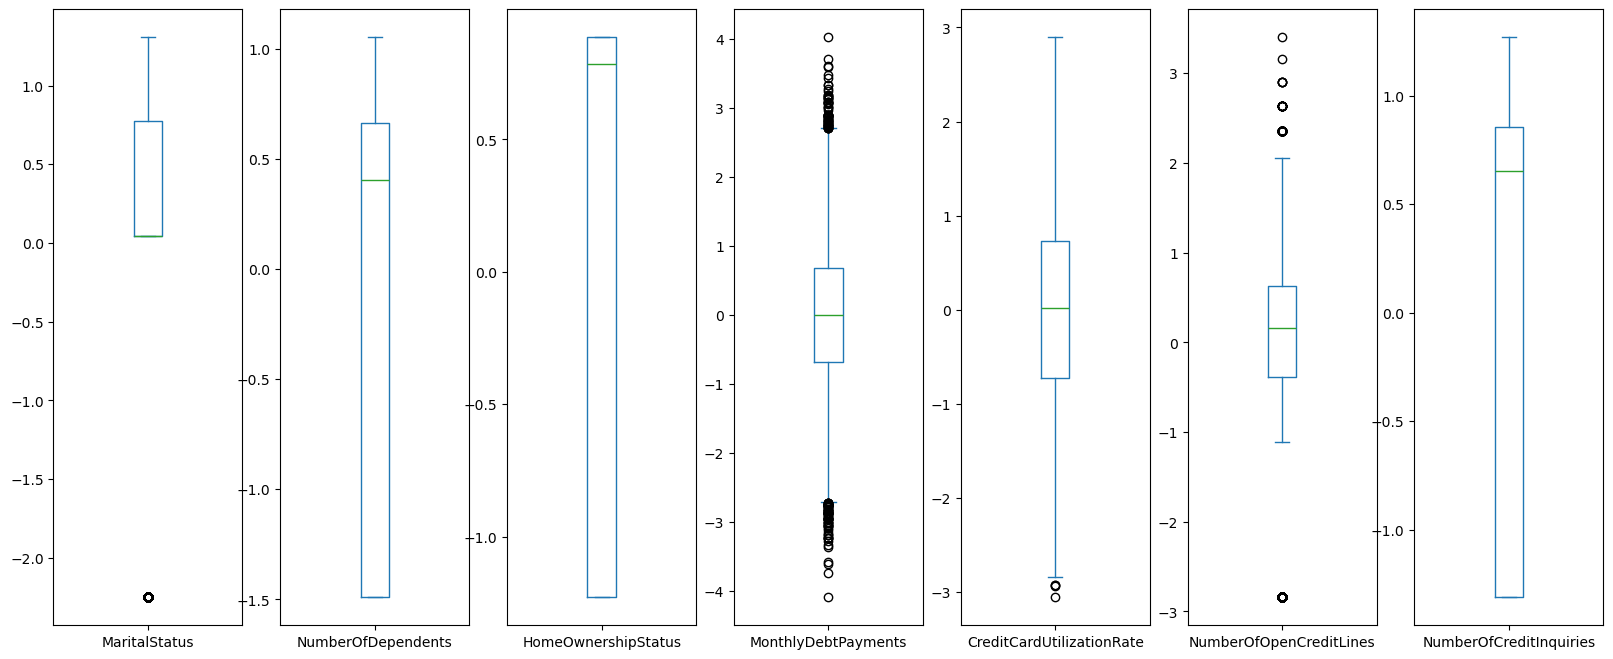

In [28]:
# Обнаружение выбросов
df.iloc[:, 7:14].plot(kind="box", sharex=False, subplots=True, figsize=(20,8))
plt.show()

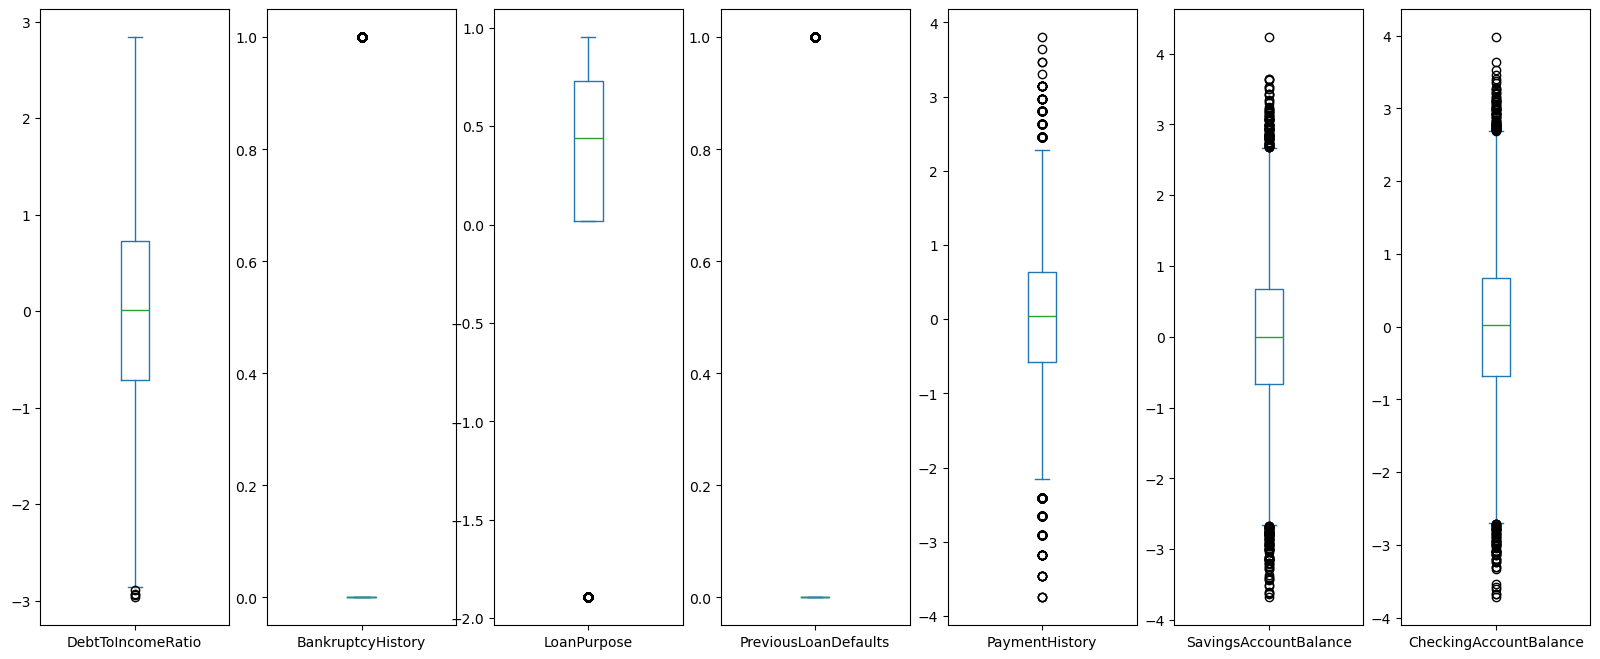

In [29]:
# Обнаружение выбросов
df.iloc[:, 14:21].plot(kind="box", sharex=False, subplots=True, figsize=(20,8))
plt.show()

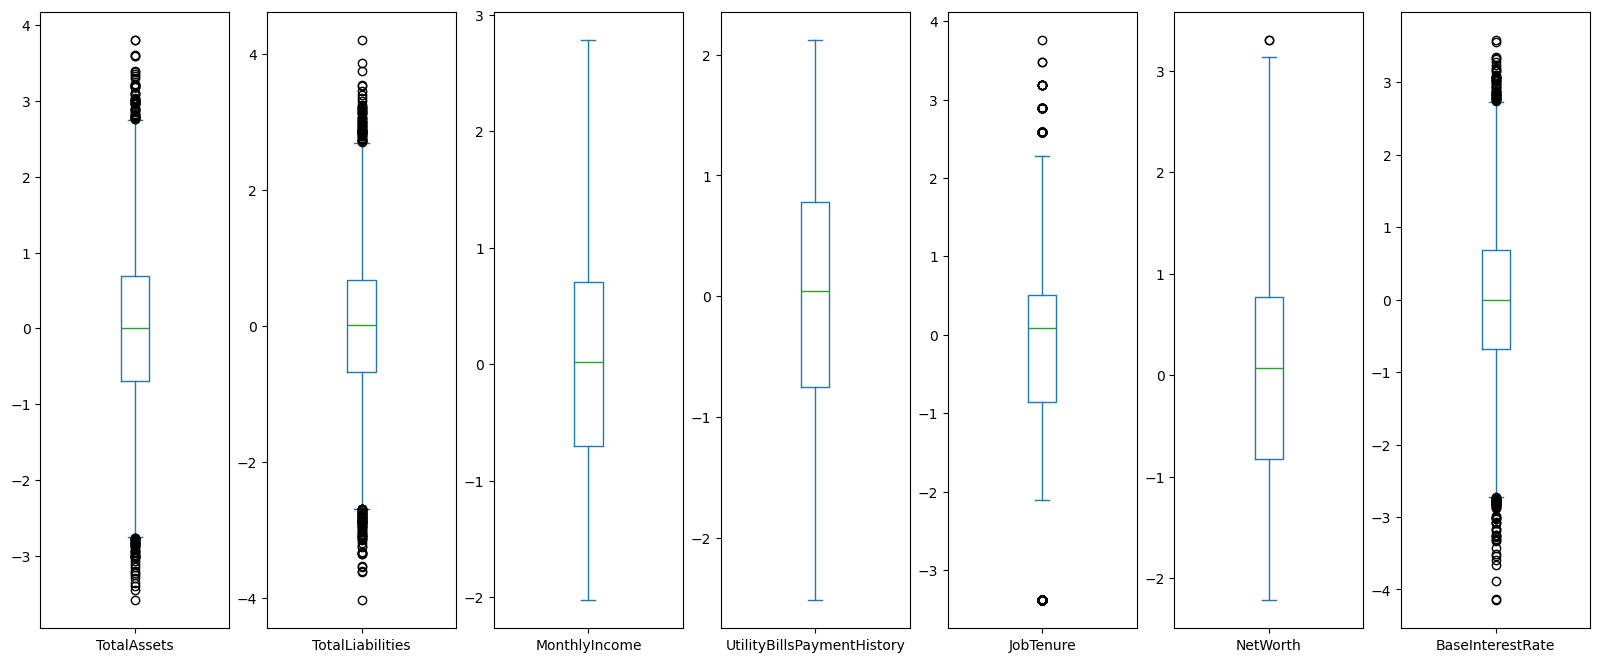

In [30]:
# Обнаружение выбросов
df.iloc[:, 21:28].plot(kind="box", sharex=False, subplots=True, figsize=(20,8))
plt.show()

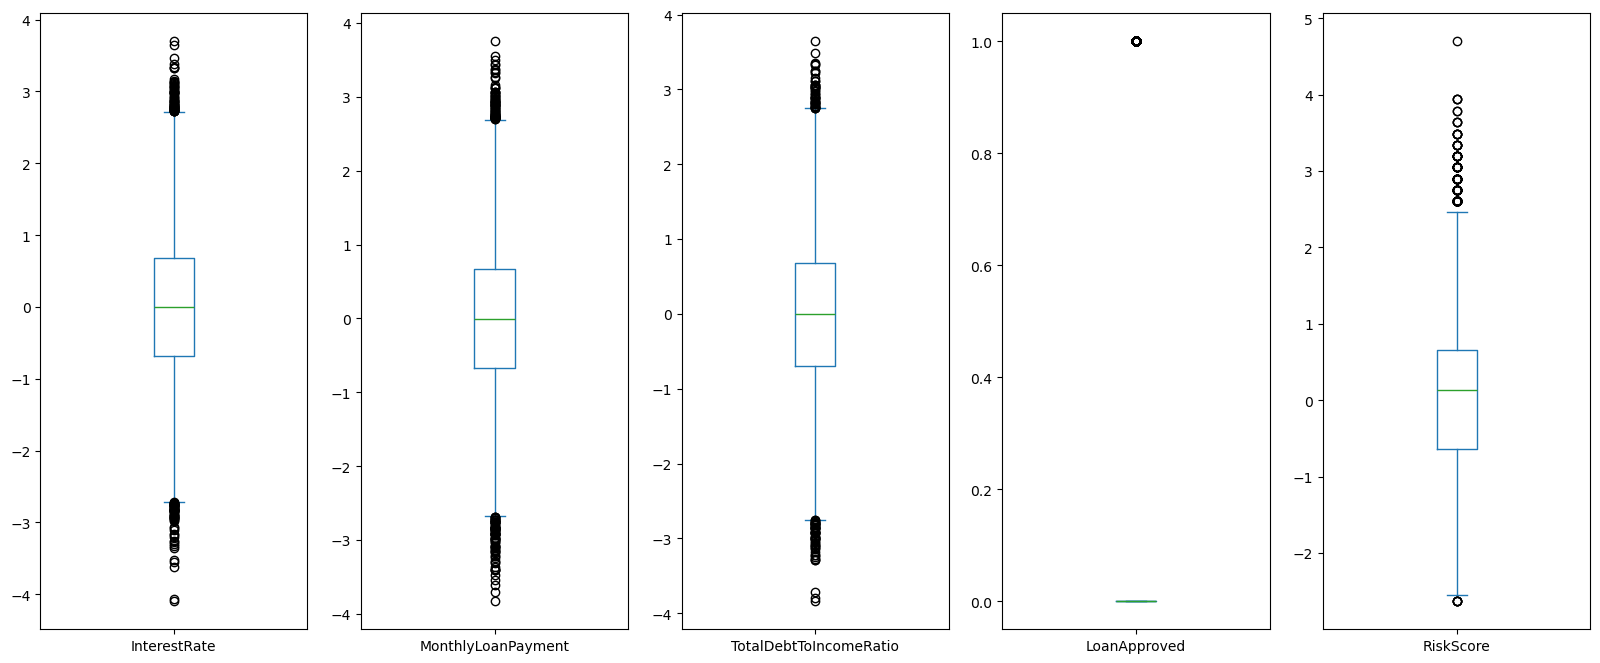

In [31]:
# Обнаружение выбросов
df.iloc[:, 28:].plot(kind="box", sharex=False, subplots=True, figsize=(20,8))
plt.show()

In [33]:
df.shape

(20000, 33)

### Оценка тесноты связи 

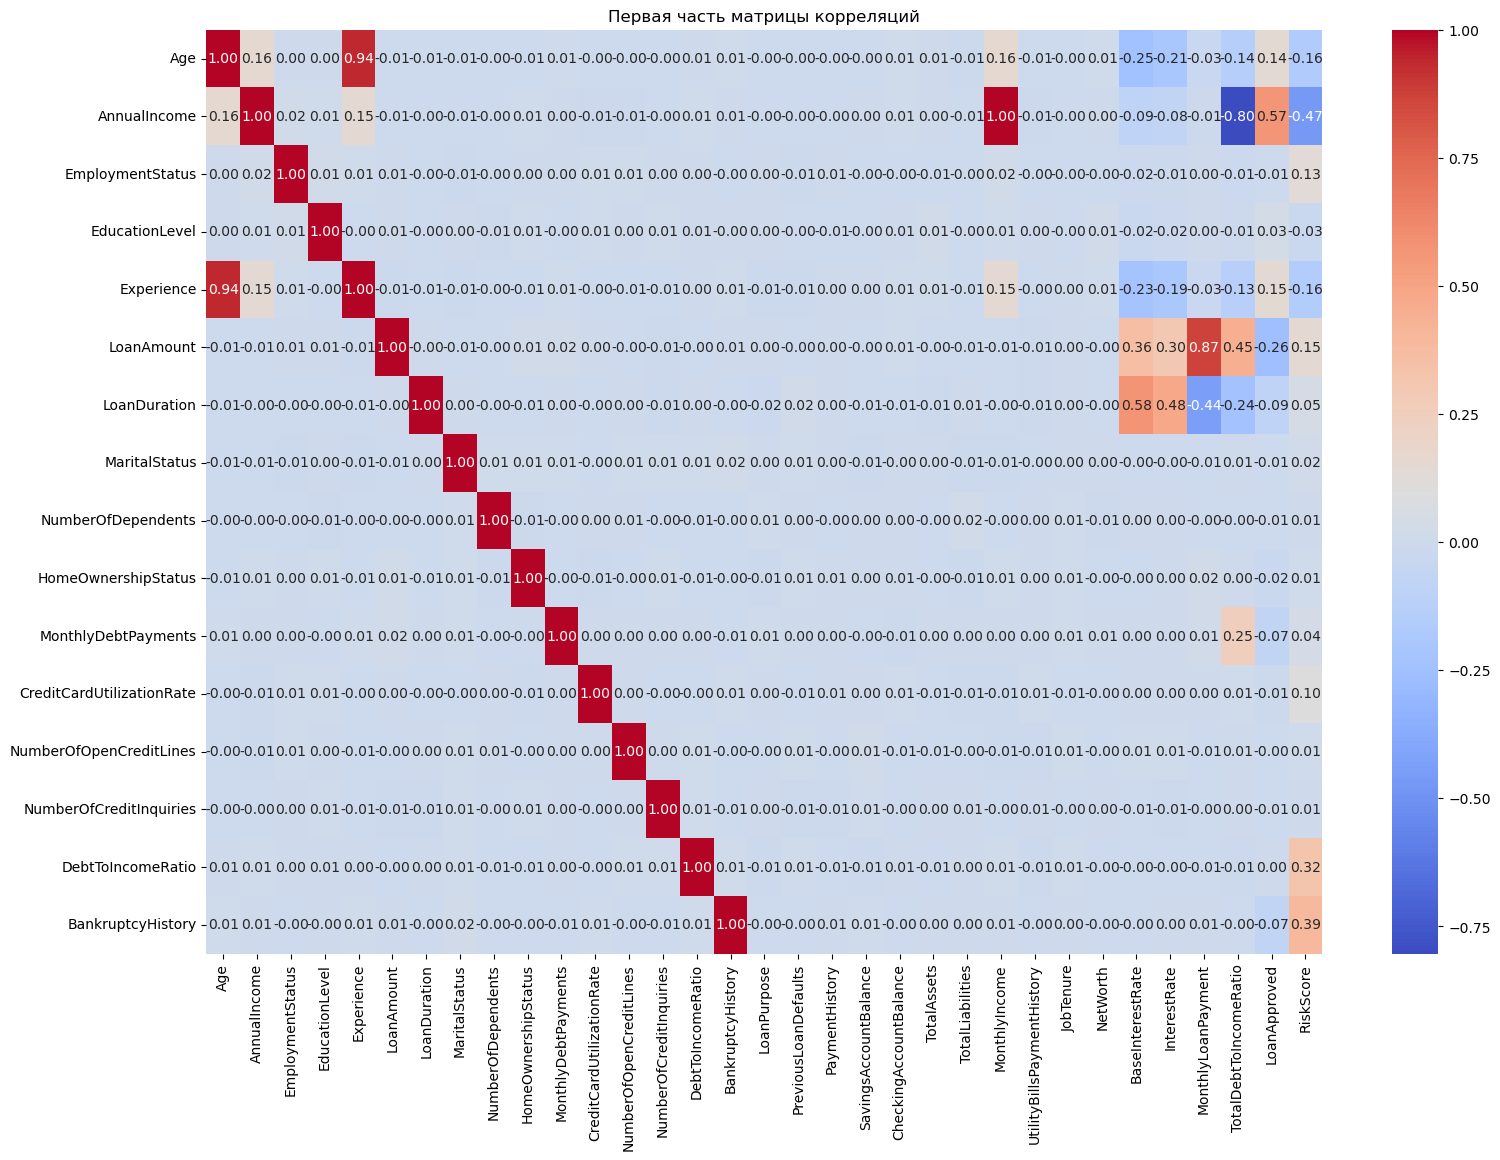

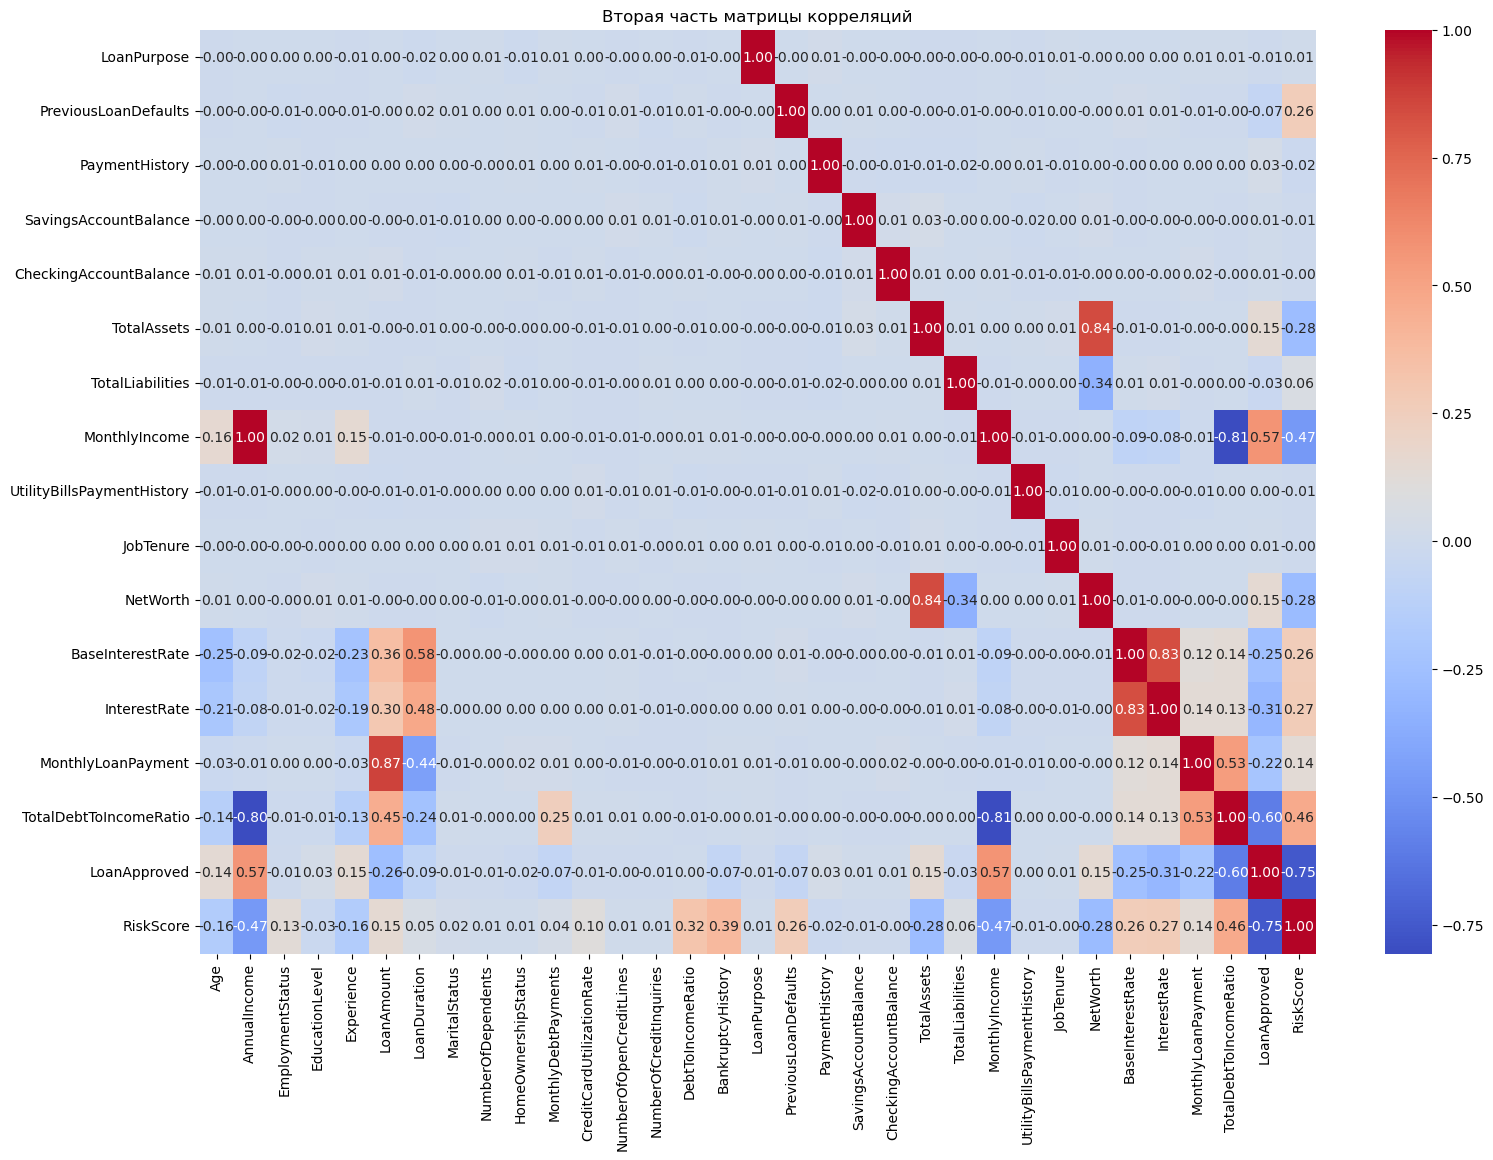

In [34]:
df_corr = df.corr()
df_corr_part1 = df_corr.iloc[:len(df_corr)//2, :]
df_corr_part2 = df_corr.iloc[len(df_corr)//2:, :]

# Визуализация первой части
plt.figure(figsize=(18, 12))
sns.heatmap(df_corr_part1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Первая часть матрицы корреляций")
plt.show()

# Визуализация второй части
plt.figure(figsize=(18, 12))
sns.heatmap(df_corr_part2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Вторая часть матрицы корреляций")
plt.show()

In [35]:
upper_threshold = df["RiskScore"].quantile(0.97)  # Вычисляем порог (97-й перцентиль)

# Обновляем значения в столбце "RiskScore"
df.loc[df["RiskScore"] > upper_threshold, "RiskScore"] = upper_threshold

In [36]:
# Удаляем выбросы в данных
def remove_outliers(df, columns=None, factor=1.5):
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns  # Обработка только числовых столбцов
    
    for col in columns:
        q1 = df[col].quantile(0.25)  # Первый квартиль
        q3 = df[col].quantile(0.75)  # Третий квартиль
        iqr = q3 - q1  # Межквартильный размах
        
        # Границы без выбросов
        lower_bound = q1 - factor * iqr
        upper_bound = q3 + factor * iqr
        
        # Фильтруем DataFrame, удаляя строки с выбросами
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df
    
df = remove_outliers(df, columns=df.drop(columns=bin_vars).columns.to_list())

In [37]:
# Удаляем по 1 из коррелирующих признаков
df.drop(columns=["Age","AnnualIncome", "BaseInterestRate", "TotalDebtToIncomeRatio",  "LoanAmount",  "NetWorth"]+cat_vars, inplace=True)

In [38]:
# Удаляем признаки, у которых коэффициент корелляции с целевым <1%
df.drop(columns=["JobTenure", "CheckingAccountBalance", "NumberOfCreditInquiries",  "NumberOfOpenCreditLines"], inplace=True)

In [39]:
# Признак слишком коррелирует с целевым и на практике определяется позже
df.drop(columns=["LoanApproved"], inplace=True)

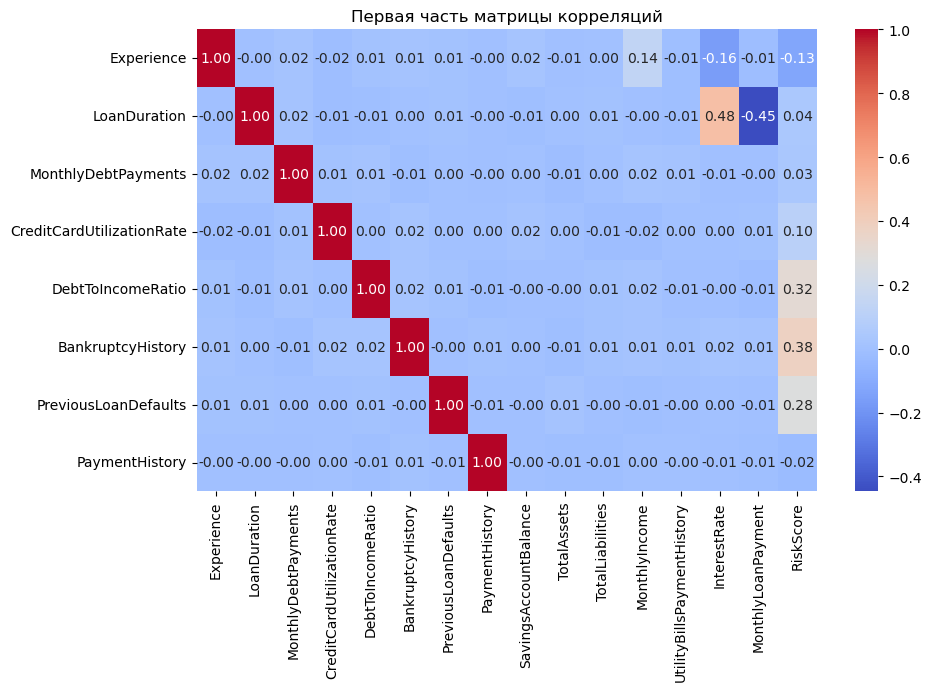

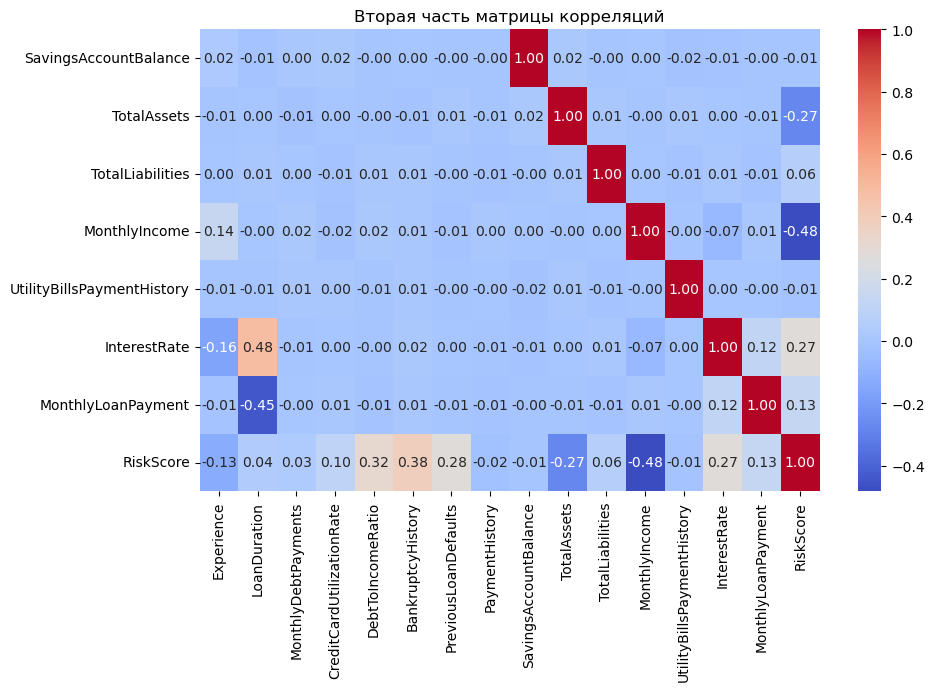

In [40]:
df_corr = df.corr()
df_corr_part1 = df_corr.iloc[:len(df_corr)//2, :]
df_corr_part2 = df_corr.iloc[len(df_corr)//2:, :]

# Визуализация первой части
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr_part1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Первая часть матрицы корреляций")
plt.show()

# Визуализация второй части
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr_part2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Вторая часть матрицы корреляций")
plt.show()

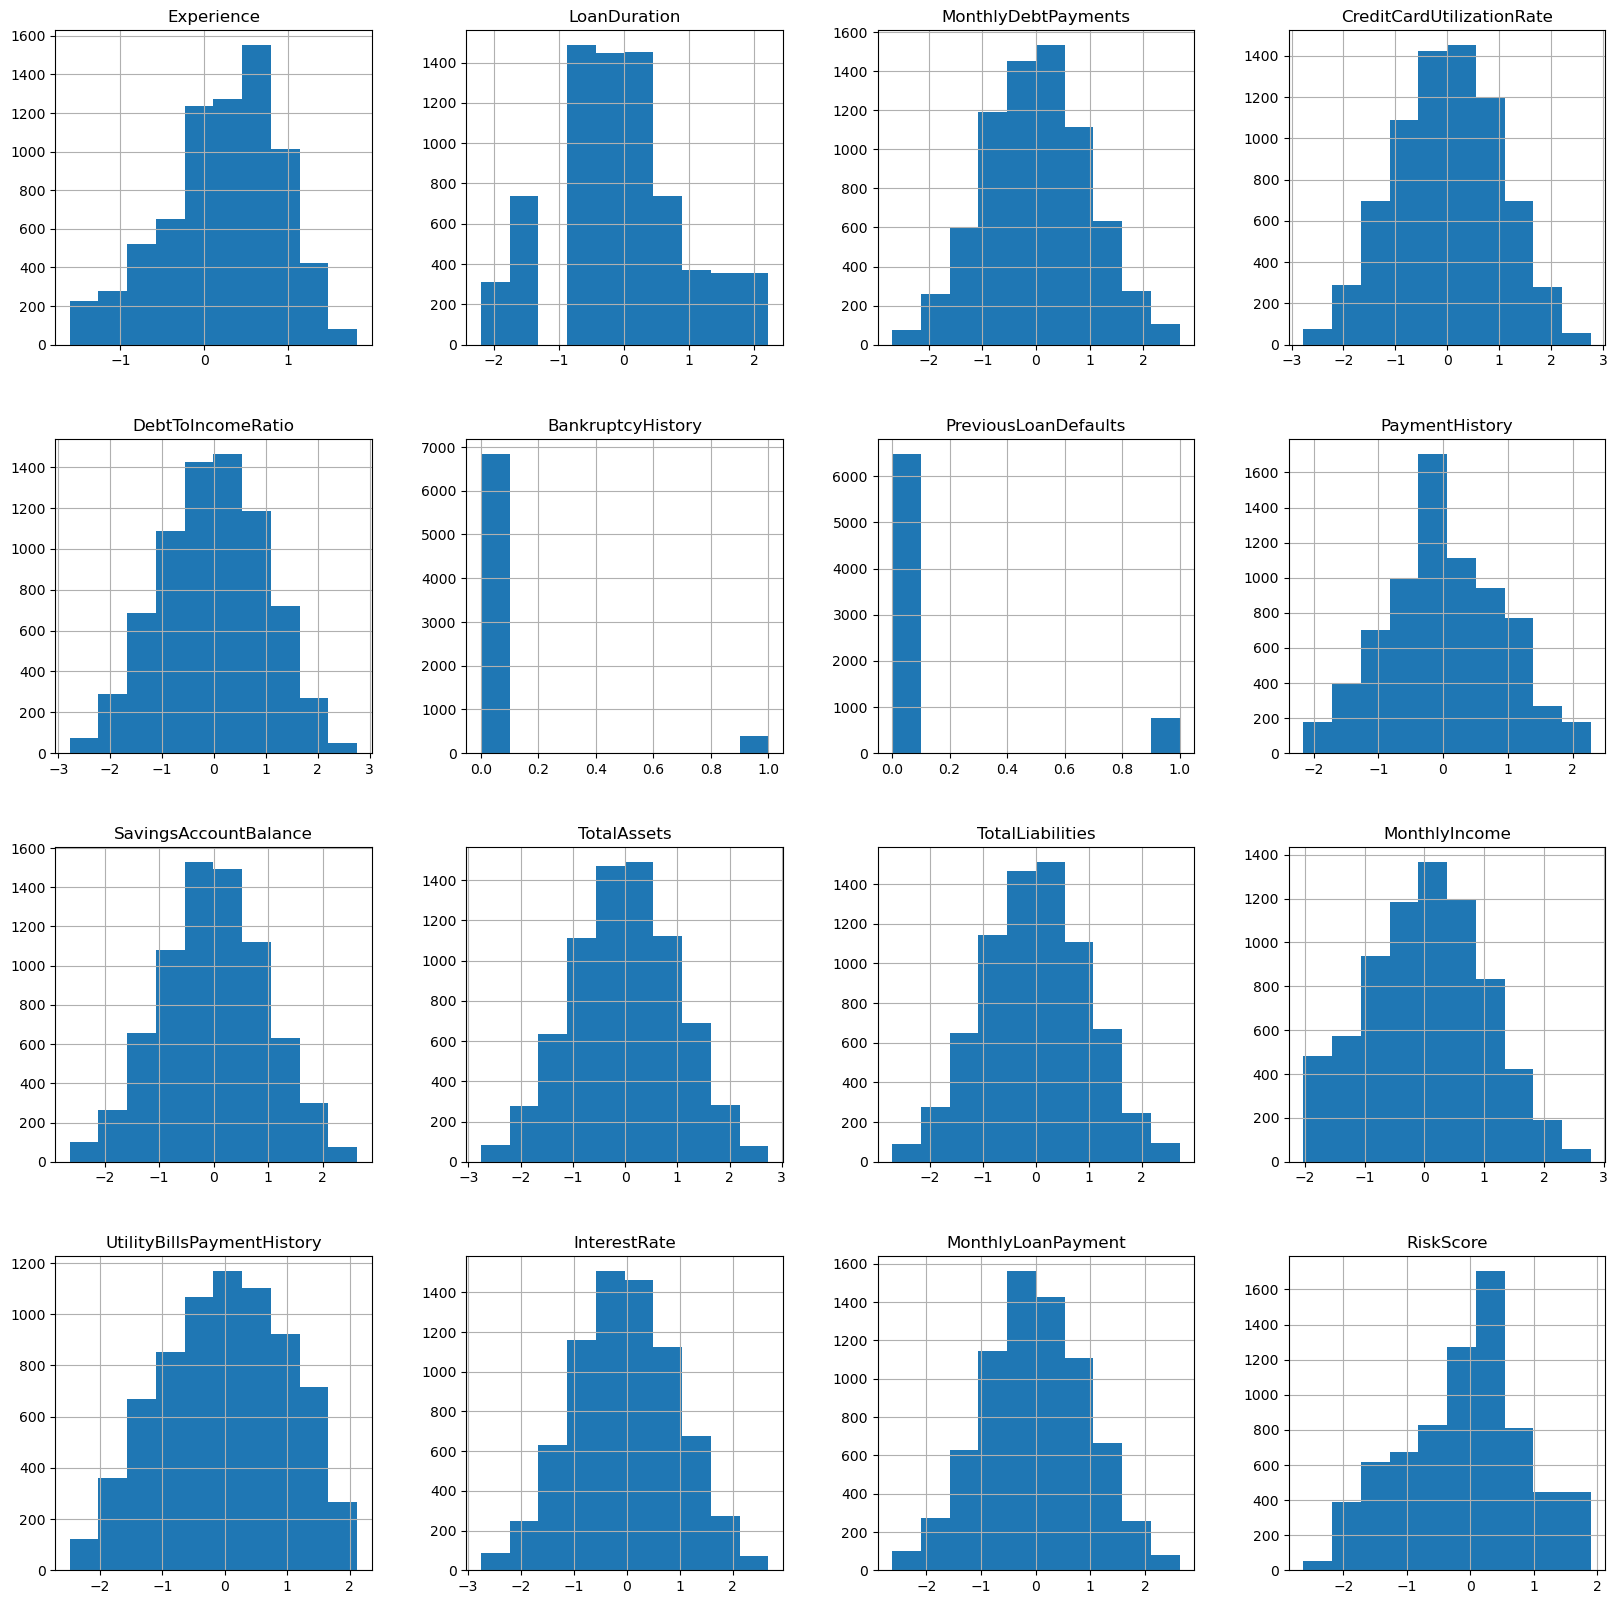

In [41]:
# Оставшиеся признаки
df.hist(figsize =(20, 20));

In [42]:
# Сохраняем результат обработки
df.to_csv("Loan_prep.csv")
df.to_excel("Loan_prep.xlsx")

In [44]:
descr_features(df)

,data_type,n_NaN,%NaN,nunique,count,mean,std,min,25%,50%,75%,max,Jarque-Bera,p-value
Experience,float64,0,0.0,55,7248.0,0.0,1.0,-2.0,-0.0,0.0,1.0,2.0,274.412244,2.583083e-60
LoanDuration,float64,0,0.0,10,7248.0,-0.0,1.0,-2.0,-1.0,-0.0,1.0,2.0,5.483685,6.445150e-02
MonthlyDebtPayments,float64,0,0.0,1025,7248.0,0.0,1.0,-3.0,-1.0,0.0,1.0,3.0,19.801841,5.012851e-05
CreditCardUtilizationRate,float64,0,0.0,7248,7248.0,-0.0,1.0,-3.0,-1.0,0.0,1.0,3.0,70.566407,4.750064e-16
DebtToIncomeRatio,float64,0,0.0,7248,7248.0,-0.0,1.0,-3.0,-1.0,0.0,1.0,3.0,75.735072,3.583753e-17
BankruptcyHistory,int64,0,0.0,2,7248.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,69557.104310,0.000000e+00
PreviousLoanDefaults,int64,0,0.0,2,7248.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14629.044944,0.000000e+00
PaymentHistory,float64,0,0.0,23,7248.0,0.0,1.0,-2.0,-1.0,0.0,1.0,2.0,65.638099,5.583005e-15
SavingsAccountBalance,float64,0,0.0,4981,7248.0,-0.0,1.0,-3.0,-1.0,-0.0,1.0,3.0,25.032281,3.666986e-06
TotalAssets,float64,0,0.0,7093,7248.0,0.0,1.0,-3.0,-1.0,0.0,1.0,3.0,37.015847,9.164547e-09


In [49]:
# Оценка параметров методом МНК1 (итоговая таблица с описательными статистиками)
def calculate_statistics(df):
    # Инициализируем пустой список для хранения статистик
    stats = []
    
    # Проходим по всем числовым столбцам датафрейма
    for column in df.select_dtypes(include=[np.number]).columns:
        mean = np.mean(df[column])  # Математическое ожидание
        median = np.median(df[column])  # Медиана
        maximum = np.max(df[column])  # Максимум
        minimum = np.min(df[column])  # Минимум
        std_dev = np.std(df[column])  # Стандартное отклонение
        skewness = skew(df[column])  # Коэффициент асимметрии
        kurt = kurtosis(df[column])  # Коэффициент эксцесса
        
        # Сохраняем значения в виде словаря
        stats.append({
            'Feature': column,
            'Mean': mean,
            'Median': median,
            'Maximum': maximum,
            'Minimum': minimum,
            'Std.Dev.': std_dev,
            'Skewness': skewness,
            'Kurtosis': kurt
        })
    
    # Преобразуем список в датафрейм
    stats_df = pd.DataFrame(stats)
    return stats_df
    
calculate_statistics(df)

,Feature,Mean,Median,Maximum,Minimum,Std.Dev.,Skewness,Kurtosis
0,Experience,0.226558,0.285211,1.824809,-1.606310,0.673783,-0.471677,-0.136868
1,LoanDuration,-0.005037,-0.126998,2.217504,-2.195824,0.983184,0.018284,-0.129695
2,MonthlyDebtPayments,0.011389,0.010852,2.682591,-2.687141,0.963756,0.040809,-0.242708
3,CreditCardUtilizationRate,-0.003455,0.015767,2.761567,-2.773531,1.000209,-0.066054,-0.464985
4,DebtToIncomeRatio,-0.003734,0.013499,2.762002,-2.783067,0.995267,-0.068697,-0.481561
5,BankruptcyHistory,0.055602,0.000000,1.000000,0.000000,0.229151,3.878658,13.043987
6,PreviousLoanDefaults,0.104719,0.000000,1.000000,0.000000,0.306190,2.581932,4.666374
7,PaymentHistory,0.005584,0.037103,2.283039,-2.158057,0.931384,0.016554,-0.465025
8,SavingsAccountBalance,-0.007057,-0.006886,2.634359,-2.644670,0.956528,-0.039191,-0.277028
9,TotalAssets,0.001351,0.006848,2.742883,-2.760365,0.992031,-0.022658,-0.347153


## Modeling

In [45]:
X = df.drop(columns=["RiskScore"])
y = df["RiskScore"]

In [ ]:
# Обучение полиномиальной регрессии и анализ остатков
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from scipy.stats import skew, kurtosis
from scipy.stats import zscore

# Полиномиальные признаки
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Полиномиальная регрессия
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

## Evaluation

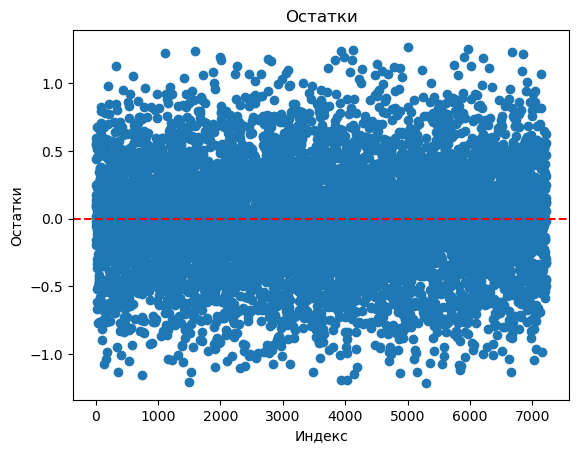

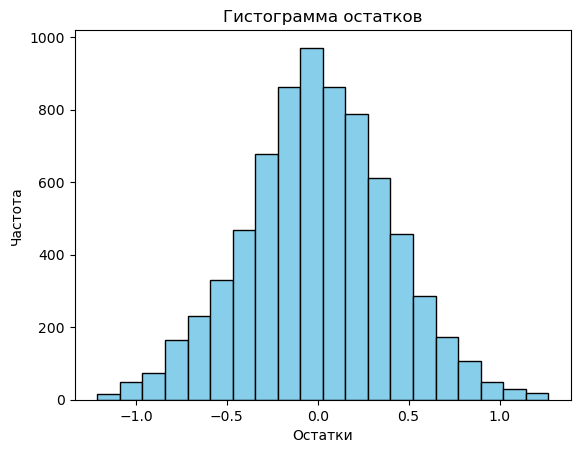

Ассиметрия остатков: -0.00404796958888035
Эксцесс остатков: 0.045916076132469286
Статистика Жака-Бера: 0.6545946426352091
P-значение (Жака-Бера): 0.7208693813267577


In [46]:
# Остатки
residuals = y - y_pred

# Вычисляем Z-оценки остатков
z_scores = zscore(residuals)
result_indices = np.where(np.abs(z_scores) < 3.1)[0]  # Оставляем только значения с |z| < 3

result_X = X.iloc[result_indices]
result_y = y.iloc[result_indices]

# Построение новой модели
result_X_poly = poly.fit_transform(result_X)
result_model = LinearRegression()
result_model.fit(result_X_poly, result_y)
result_y_pred = result_model.predict(result_X_poly)

# Новые остатки
residuals = result_y - result_y_pred

# Визуализация остатков
plt.scatter(range(len(residuals)), residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Остатки')
plt.xlabel('Индекс')
plt.ylabel('Остатки')
plt.show()

# Гистограмма остатков
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black')
plt.title('Гистограмма остатков')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.show()

# Расчёт асимметрии и эксцесса
residual_skewness = skew(residuals)
residual_kurtosis = kurtosis(residuals)

# Тест Жака-Бера на новых остатках
jb_stat, p_value = jarque_bera(residuals)

# Вывод результатов
print(f"Ассиметрия остатков: {residual_skewness}")
print(f"Эксцесс остатков: {residual_kurtosis}")
print(f"Статистика Жака-Бера: {jb_stat}")
print(f"P-значение (Жака-Бера): {p_value}")


In [47]:
# Оценка автокорреляции
from statsmodels.stats.stattools import durbin_watson

# Вычисляем статистику Дарбина-Уотсона на основе остатков
dw_stat = durbin_watson(residuals)

# Вывод результата
print(f"Статистика Дарбина-Уотсона: {dw_stat}")

Статистика Дарбина-Уотсона: 1.986300812822483


In [48]:
# Оценка метрики качества 
from sklearn.metrics import r2_score
r2_score(y_pred, y)

0.7895022275568899

In [50]:
# Регрессионные статистики для каждого параметра
import statsmodels.api as sm
def calculate_regr_metrics(df, target_column):
    # Список для хранения метрик для каждой независимой переменной
    results = []
    
    # Проходим по всем признакам, кроме целевого
    for feature in df.columns:
        if feature != target_column:  # Исключаем целевой признак
            # Формируем данные для регрессии
            X = df[[feature]]  # Независимая переменная
            X = sm.add_constant(X)  # Добавляем константу
            y = df[target_column]  # Целевой признак
            
            # Построение модели
            model = sm.OLS(y, X).fit()
            
            # Расчёт статистик
            r_squared = model.rsquared  # R^2
            adjusted_r_squared = model.rsquared_adj  # Нормированный R^2
            standard_error = np.sqrt(model.mse_resid)  # Стандартная ошибка
            n_observations = int(model.nobs)  # Количество наблюдений
            
            # Множественный R (корень из R^2)
            multiple_r = np.sqrt(r_squared)
            
            # Сохраняем результаты для текущего признака
            results.append({
                'Признак': feature,
                'Множественный R': multiple_r,
                'R2': r_squared,
                'Нормированный R2': adjusted_r_squared,
                'Стандартная ошибка': standard_error,
                'Наблюдений': n_observations
            })
    
    # Возвращаем датафрейм с метриками для всех признаков
    results_df = pd.DataFrame(results)
    return results_df

In [52]:
calculate_regr_metrics(df, "RiskScore")

,Признак,Множественный R,R2,Нормированный R2,Стандартная ошибка,Наблюдений
0,Experience,0.127644,0.016293,0.016157,0.962565,7248
1,LoanDuration,0.042454,0.001802,0.001665,0.969629,7248
2,MonthlyDebtPayments,0.034110,0.001163,0.001026,0.969939,7248
3,CreditCardUtilizationRate,0.102776,0.010563,0.010426,0.965365,7248
4,DebtToIncomeRatio,0.315126,0.099305,0.099180,0.921056,7248
5,BankruptcyHistory,0.381205,0.145317,0.145199,0.897222,7248
6,PreviousLoanDefaults,0.275158,0.075712,0.075584,0.933042,7248
7,PaymentHistory,0.023437,0.000549,0.000411,0.970237,7248
8,SavingsAccountBalance,0.005825,0.000034,-0.000104,0.970487,7248
9,TotalAssets,0.274717,0.075469,0.075342,0.933164,7248


In [53]:
# Оценка значимости параметров
import statsmodels.api as sm

def calculate_advanced_stats(df, target_column):
    # Список для хранения метрик для каждого признака
    results = []
    
    # Проходим по всем признакам, кроме целевого
    for feature in df.columns:
        if feature != target_column:  # Исключаем целевой признак
            # Формируем данные для регрессии
            X = df[[feature]]  # Независимая переменная
            X = sm.add_constant(X)  # Добавляем константу
            y = df[target_column]  # Целевой признак
            
            # Построение модели
            model = sm.OLS(y, X).fit()
            
            # Извлечение t-статистик и p-значений
            t_stats = model.tvalues  # t-статистики
            p_values_t = model.pvalues  # p-значения для t-статистик
            
            # Извлечение F-статистики и её p-значения
            f_stat = model.fvalue  # F-статистика
            p_value_f = model.f_pvalue  # p-значение для F-статистики
            
            # Добавление данных в список
            results.append({
                'Признак': feature,
                't-статистика (признак)': t_stats.iloc[1],  # t-статистика для признака
                'p-value (признак)': p_values_t.iloc[1],    # p-значение для t-статистики признака
                't-статистика (y-пересечение)': t_stats.iloc[0],  # t-статистика для константы
                'p-value (y-пересечение)': p_values_t.iloc[0],    # p-значение для t-статистики константы
                'F-статистика': f_stat,              # F-статистика
                'p-value (F-статистика)': p_value_f  # p-значение для F-статистики
            })
    
    # Преобразуем список в датафрейм
    results_df = pd.DataFrame(results)
    return results_df

# Пример использования
calculate_advanced_stats(df, 'RiskScore')


,Признак,t-статистика (признак),p-value (признак),t-статистика (y-пересечение),p-value (y-пересечение),F-статистика,p-value (F-статистика)
0,Experience,-10.955149,1.034693e-27,-3.748354,1.793837e-04,120.015280,1.034693e-27
1,LoanDuration,3.617053,3.000034e-04,-7.563952,4.392052e-14,13.083072,3.000034e-04
2,MonthlyDebtPayments,2.905218,3.681076e-03,-7.613959,2.995059e-14,8.440293,3.681076e-03
3,CreditCardUtilizationRate,8.795247,1.761368e-18,-7.585653,3.720878e-14,77.356367,1.761368e-18
4,DebtToIncomeRatio,28.264734,8.104510e-167,-7.876351,3.862894e-15,798.895173,8.104510e-167
5,BankruptcyHistory,35.099825,2.089342e-249,-16.239968,2.788833e-58,1231.997695,2.089342e-249
6,PreviousLoanDefaults,24.362801,4.485671e-126,-15.339786,2.733004e-52,593.546049,4.485671e-126
7,PaymentHistory,-1.995577,4.601739e-02,-7.565727,4.332949e-14,3.982326,4.601739e-02
8,SavingsAccountBalance,-0.495878,6.199956e-01,-7.579327,3.905349e-14,0.245895,6.199956e-01
9,TotalAssets,-24.320574,1.161927e-125,-7.845765,4.921232e-15,591.490296,1.161927e-125


In [54]:
# После удаления незначимых факторов
calculate_advanced_stats(df.drop(columns=["UtilityBillsPaymentHistory", "SavingsAccountBalance"]), 'RiskScore')

,Признак,t-статистика (признак),p-value (признак),t-статистика (y-пересечение),p-value (y-пересечение),F-статистика,p-value (F-статистика)
0,Experience,-10.955149,1.034693e-27,-3.748354,1.793837e-04,120.015280,1.034693e-27
1,LoanDuration,3.617053,3.000034e-04,-7.563952,4.392052e-14,13.083072,3.000034e-04
2,MonthlyDebtPayments,2.905218,3.681076e-03,-7.613959,2.995059e-14,8.440293,3.681076e-03
3,CreditCardUtilizationRate,8.795247,1.761368e-18,-7.585653,3.720878e-14,77.356367,1.761368e-18
4,DebtToIncomeRatio,28.264734,8.104510e-167,-7.876351,3.862894e-15,798.895173,8.104510e-167
5,BankruptcyHistory,35.099825,2.089342e-249,-16.239968,2.788833e-58,1231.997695,2.089342e-249
6,PreviousLoanDefaults,24.362801,4.485671e-126,-15.339786,2.733004e-52,593.546049,4.485671e-126
7,PaymentHistory,-1.995577,4.601739e-02,-7.565727,4.332949e-14,3.982326,4.601739e-02
8,TotalAssets,-24.320574,1.161927e-125,-7.845765,4.921232e-15,591.490296,1.161927e-125
9,TotalLiabilities,5.372495,8.006992e-08,-7.577599,3.957281e-14,28.863700,8.006992e-08


## Предсказания модели

In [55]:
import random

# 1. Выбираем 5 случайных записей из датафрейма
random_indices = random.sample(range(len(df)), 5)
random_samples = df.iloc[random_indices].copy()  # Используем copy() для безопасного изменения

# Выполняем обратное преобразование Box-Cox для RiskScore
random_samples.loc[:, "RiskScore"] = target_transformer.inverse_transform(
    random_samples[["RiskScore"]]  # Передаём данные как DataFrame с правильными именами столбцов
)

# 2. Преобразуем X для полиномиальной регрессии
random_samples_X = random_samples.drop(columns="RiskScore") 
random_samples_X_poly = poly.transform(random_samples_X)

# 3. Рассчитываем прогнозы
predictions = result_model.predict(random_samples_X_poly)

# Выполняем обратное преобразование Box-Cox для предсказаний
predictions = target_transformer.inverse_transform(pd.DataFrame(predictions, columns=["RiskScore"]))

# 4. Оформляем предсказания в датафрейм
random_samples.loc[:, "Предсказание"] = predictions
predictions_df = random_samples

print("Предсказания для случайных записей (после обратного Box Cox преобразования:")
print(predictions_df)

Предсказания для случайных записей (после обратного Box Cox преобразования:
       Experience  LoanDuration  MonthlyDebtPayments  \
9795     1.036326     -1.330934             0.700233   
4124     0.285211     -0.675359            -0.669998   
14713    0.993713     -0.675359            -0.959625   
8873     0.092240     -0.126998             0.576767   
12277    0.514280      0.353324             2.623890   

       CreditCardUtilizationRate  DebtToIncomeRatio  BankruptcyHistory  \
9795                    2.217704           1.450762                  0   
4124                   -0.171985           1.698395                  0   
14713                  -0.231541          -0.281684                  0   
8873                   -0.470002           0.449269                  0   
12277                   0.469751          -1.356393                  0   

       PreviousLoanDefaults  PaymentHistory  SavingsAccountBalance  \
9795                      0        1.011326               0.951493   
41

## Уравнение регрессии

In [56]:
# 5. Формируем датафрейм с коэффициентами
coefficients = result_model.coef_

# Исходные признаки
original_features = X.columns

# Разбиваем коэффициенты по степеням (x^1, x^2, x^3)
coef_dict = {feature: {"Коэффициент при x^1": 0, 
                       "Коэффициент при x^2": 0, 
                       "Коэффициент при x^3": 0} for feature in original_features}

# Получаем названия полиномиальных признаков
poly_features = poly.get_feature_names_out(original_features)

# Заполняем коэффициенты по степеням
for i, feature in enumerate(poly_features):
    if "^2" in feature:  # Квадратичные признаки
        base_feature = feature.split("^")[0]  # Извлекаем базовый признак
        if base_feature in coef_dict:
            coef_dict[base_feature]["Коэффициент при x^2"] += coefficients[i]
    elif "^3" in feature:  # Кубические признаки
        base_feature = feature.split("^")[0]  # Извлекаем базовый признак
        if base_feature in coef_dict:
            coef_dict[base_feature]["Коэффициент при x^3"] += coefficients[i]
    else:  # Линейные признаки
        base_feature = feature  # Для линейных признаков имя не изменяется
        if base_feature in coef_dict:
            coef_dict[base_feature]["Коэффициент при x^1"] += coefficients[i]

# Преобразуем в датафрейм
coefficients_df = pd.DataFrame.from_dict(coef_dict, orient='index').reset_index()
coefficients_df.rename(columns={'index': 'Признак'}, inplace=True)

# Свободный член (коэффициент при константе)
intercept = result_model.intercept_

print("\nСвободный член (коэффициент при константе): ", intercept)
coefficients_df


Свободный член (коэффициент при константе):  9072794.772950927


,Признак,Коэффициент при x^1,Коэффициент при x^2,Коэффициент при x^3
0,Experience,-5.163821e-02,9.494826e-03,-4.365444e-03
1,LoanDuration,-3.557149e-02,-2.969718e-02,6.896973e-03
2,MonthlyDebtPayments,2.871753e-02,1.588261e-02,1.777649e-03
3,CreditCardUtilizationRate,9.503999e-02,-6.987572e-03,-1.054764e-03
4,DebtToIncomeRatio,4.148750e-01,-2.256513e-02,-3.345156e-02
5,BankruptcyHistory,-6.501473e+10,3.480202e+10,3.300537e+10
6,PreviousLoanDefaults,1.085181e+11,-5.411694e+10,-5.439714e+10
7,PaymentHistory,-4.179886e-02,-1.044744e-02,4.409790e-03
8,SavingsAccountBalance,8.055091e-03,1.433045e-02,1.937866e-03
9,TotalAssets,-2.696433e-01,-1.076394e-01,-1.302147e-02


## Построение доверительных интервалов

In [57]:
from scipy.stats import t

# Вычисляем параметры выборки
sample_mean = predictions_df['RiskScore'].mean()  # выборочное среднее
sample_std = predictions_df['RiskScore'].std(ddof=1)  # стандартное отклонение
sample_size = len(predictions_df['RiskScore'])  # размер выборки

# Уровень доверия (например, 95%)
confidence_level = 0.95
alpha = 1 - confidence_level

# Коэффициент t для доверительного интервала
t_value = t.ppf(1 - alpha / 2, df=sample_size - 1)

# Стандартная ошибка
standard_error = sample_std / np.sqrt(sample_size)

# Границы доверительного интервала
lower_bound = sample_mean - t_value * standard_error
upper_bound = sample_mean + t_value * standard_error

print("Выборочное среднее RiskScore ", sample_mean)
print("Стандартное отклонение RiskScore ", sample_std)
print(f"Доверительный интервал (уровень доверия {confidence_level}): от {lower_bound:.2f} до {upper_bound:.2f}")

Выборочное среднее RiskScore  50.840000999999994
Стандартное отклонение RiskScore  7.518510490782063
Доверительный интервал (уровень доверия 0.95): от 41.50 до 60.18


In [58]:
# Объём выборки и число предикторов
n = len(df)  # Объём выборки
k = random_samples_X.shape[1]  # Количество предикторов

# Остаточная дисперсия модели
standard_error = np.sqrt(np.sum((random_samples["Предсказание"] - predictions.flatten())**2) / (n - k - 1))

# Критическое значение t
t_critical = t.ppf(1 - alpha / 2, df=n - k - 1)

# Доверительные интервалы для индивидуального значения
intervals = []
for pred in predictions.flatten():
    # Корректный расчёт погрешности
    margin_error = t_critical * np.sqrt(standard_error**2 + np.var(predictions))  # Учитываем дополнительную вариацию
    lower_bound = pred - margin_error
    upper_bound = pred + margin_error
    intervals.append((lower_bound, upper_bound))

# Добавляем в DataFrame
predictions_df["Доверительный интервал для индивидуального значения (нижняя граница)"] = [interval[0] for interval in intervals]
predictions_df["Доверительный интервал для индивидуального значения (верхняя граница)"] = [interval[1] for interval in intervals]

# Вывод результатов
print("Доверительные интервалы для индивидуальных прогнозов:")
predictions_df.iloc[:, -4:]

Доверительные интервалы для индивидуальных прогнозов:


,RiskScore,Предсказание,Доверительный интервал для индивидуального значения (нижняя граница),Доверительный интервал для индивидуального значения (верхняя граница)
9795,56.000001,52.945140,43.777822,62.112459
4124,58.000001,53.605442,44.438123,62.772760
14713,39.200001,41.548650,32.381332,50.715968
8873,53.000001,54.111266,44.943948,63.278585
12277,48.000001,49.709084,40.541765,58.876402


## Экономический анализ

In [59]:
# Обратное преобразование целевой переменной
y_actual_inverse = target_transformer.inverse_transform(y.values.reshape(-1, 1))
y_pred_inverse = target_transformer.inverse_transform(y_pred.reshape(-1, 1))

# Среднее значение после обратного преобразования
mean_y_actual = np.mean(y_actual_inverse)
mean_y_pred = np.mean(y_pred_inverse)

# Оценка средней эффективности
contribution_percentage = (mean_y_actual / mean_y_pred) * 100

print("Среднее значение фактического RiskScore (обратное Бокс-Кокс преобразование):", mean_y_actual)
print("Среднее значение прогнозируемого RiskScore (обратное Бокс-Кокс преобразование):", mean_y_pred)
print(f"Прогнозируемый вклад в экономический результат: {contribution_percentage:.2f}%")

Среднее значение фактического RiskScore (обратное Бокс-Кокс преобразование): 50.10488510596027
Среднее значение прогнозируемого RiskScore (обратное Бокс-Кокс преобразование): 50.141611013155156
Прогнозируемый вклад в экономический результат: 99.93%


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


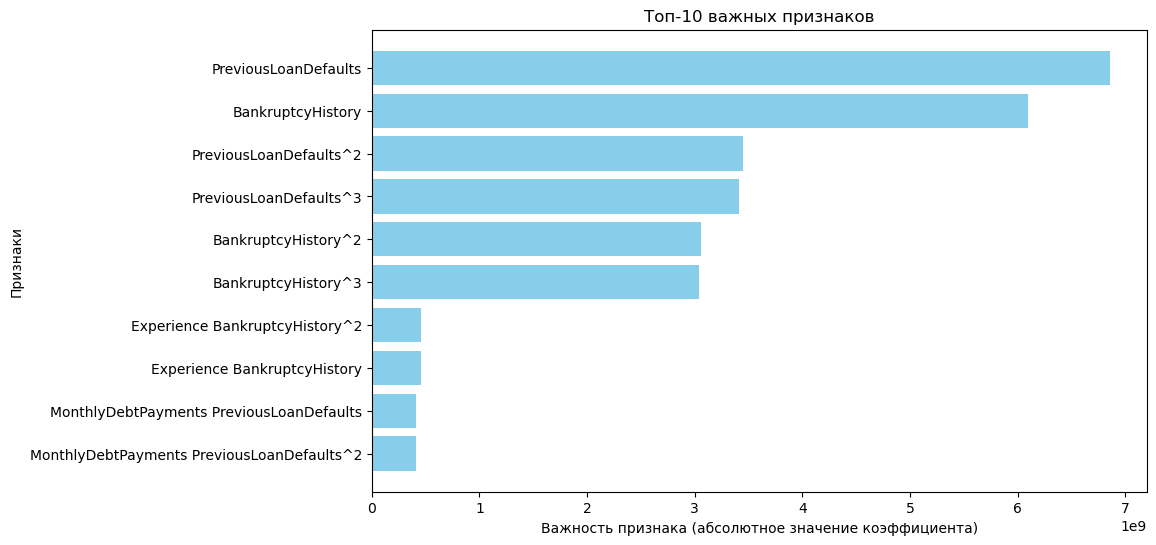

In [60]:
# Дополнительно: анализ влияния каждого признака
coefficients = model.coef_
features = poly.get_feature_names_out(input_features=X.columns)

# Формируем DataFrame для анализа коэффициентов
coefficients_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients
})

# Сортируем коэффициенты по их абсолютному значению для лучшей визуализации
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
sorted_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Построение горизонтальной столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.barh(sorted_df['Feature'].head(10), sorted_df['Absolute Coefficient'].head(10), color='skyblue')
plt.xlabel('Важность признака (абсолютное значение коэффициента)')
plt.ylabel('Признаки')
plt.title('Топ-10 важных признаков')
plt.gca().invert_yaxis()  # Инвертируем ось, чтобы самые важные признаки были наверху
plt.show()

In [61]:
# Получение коэффициентов модели
coefficients = model.coef_

# Получение названий признаков после полиномиального преобразования
feature_names = poly.get_feature_names_out(input_features=X.columns)

# Расчёт предельной эффективности
# Предельная эффективность – это частная производная целевой переменной по каждому признаку
marginal_effects = {
    feature: coef for feature, coef in zip(feature_names, coefficients)
}

# Формируем DataFrame для удобного анализа
marginal_effects_df = pd.DataFrame.from_dict(marginal_effects, orient='index', columns=['Marginal Effect'])
marginal_effects_df = marginal_effects_df.sort_values(by="Marginal Effect", ascending=False)

# Печать результатов
print("Предельная эффективность показателей:")
marginal_effects_df.head(20) # Отображаем топ-20 признаков

Предельная эффективность показателей:


,Marginal Effect
PreviousLoanDefaults^2,3.445095e+09
PreviousLoanDefaults^3,3.411543e+09
BankruptcyHistory^2,3.059572e+09
BankruptcyHistory^3,3.038604e+09
Experience BankruptcyHistory,4.533800e+08
MonthlyDebtPayments PreviousLoanDefaults,4.077434e+08
PreviousLoanDefaults InterestRate,1.786903e+08
BankruptcyHistory^2 TotalAssets,1.625897e+08
Experience PreviousLoanDefaults^2,1.397484e+08
BankruptcyHistory^2 SavingsAccountBalance,1.360492e+08


In [62]:
# Расчёт частичных коэффициентов эластичности
elasticities = []
for i in range(X.values.shape[1]):
    # Коэффициент при текущем признаке
    coef = model.coef_[i]
    # Эластичность: частная производная * (значение признака / значение предсказанного y)
    elasticity = coef * (X.values[:, i] / y_pred)
    elasticities.append(elasticity)

# Средние частичные коэффициенты эластичности
elasticities_mean = np.mean(elasticities, axis=1)

# Общая эластичность
total_elasticity = np.sum(elasticities_mean)

# Формируем DataFrame для частичных коэффициентов эластичности
elasticities_df = pd.DataFrame({
    "Feature": X.columns,  # Названия признаков
    "Mean Elasticity": elasticities_mean  # Средние частичные коэффициенты эластичности
})

# Добавляем строку для общей эластичности
total_row = pd.DataFrame({
    "Feature": ["Total Elasticity"],
    "Mean Elasticity": [total_elasticity]
})

# Объединяем таблицы
elasticities_df = pd.concat([elasticities_df, total_row], ignore_index=True)

# Вывод результата
print("Результаты расчёта частичных коэффициентов эластичности:")
elasticities_df

Результаты расчёта частичных коэффициентов эластичности:


,Feature,Mean Elasticity
0,Experience,-4.731151e+05
1,LoanDuration,-1.718888e-01
2,MonthlyDebtPayments,-7.203875e-02
3,CreditCardUtilizationRate,5.995367e-02
4,DebtToIncomeRatio,2.146182e-01
5,BankruptcyHistory,1.054301e-02
6,PreviousLoanDefaults,-1.967857e+08
7,PaymentHistory,1.803408e+10
8,SavingsAccountBalance,4.639645e-03
9,TotalAssets,1.673699e-02


In [63]:
# Функция для расчёта матрицы предельной нормы замещения (только для признаков в 1 степени)
def calculate_mrs_matrix_linear(model, X):
    # Получаем названия исходных признаков (1 степень)
    feature_names = X.columns

    # Инициализируем пустую матрицу для MRS
    num_features = len(feature_names)
    mrs_matrix = np.zeros((num_features, num_features))

    # Заполняем матрицу предельной нормы замещения
    for i in range(num_features):
        for j in range(num_features):
            if i != j:  # MRS имеет смысл только между разными признаками
                coef1 = model.coef_[i]  # Коэффициент при i-м признаке
                coef2 = model.coef_[j]  # Коэффициент при j-м признаке

                # Вычисляем предельную норму замещения
                if coef2 != 0:  # Избегаем деления на ноль
                    mrs_matrix[i, j] = -coef1 / coef2
                else:
                    mrs_matrix[i, j] = np.nan  # Если деление на ноль

    # Преобразуем матрицу в DataFrame
    mrs_df = pd.DataFrame(mrs_matrix, index=feature_names, columns=feature_names)

    return mrs_df

# Рассчитаем матрицу предельной нормы замещения для признаков в 1 степени
matrix = calculate_mrs_matrix_linear(model, X)

In [64]:
matrix.iloc[:, :7]

,Experience,LoanDuration,MonthlyDebtPayments,CreditCardUtilizationRate,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults
Experience,0.000000e+00,8.767421e+06,1.425351e+07,-1.710801e+07,-5.150754e+06,-1.203201e+06,8.159389e-05
LoanDuration,1.140586e-07,0.000000e+00,-1.625736e+00,1.951317e+00,5.874880e-01,1.372355e-01,-9.306487e-12
MonthlyDebtPayments,7.015815e-08,-6.151061e-01,0.000000e+00,1.200267e+00,3.613674e-01,8.441436e-02,-5.724477e-12
CreditCardUtilizationRate,-5.845214e-08,5.124745e-01,8.331482e-01,0.000000e+00,-3.010726e-01,-7.032967e-02,4.769337e-12
DebtToIncomeRatio,-1.941463e-07,1.702163e+00,2.767267e+00,-3.321458e+00,0.000000e+00,-2.335970e-01,1.584115e-11
BankruptcyHistory,-8.311164e-07,7.286747e+00,1.184633e+01,-1.421875e+01,-4.280876e+00,0.000000e+00,6.781402e-11
PreviousLoanDefaults,1.225582e+04,-1.074519e+11,-1.746885e+11,2.096727e+11,6.312671e+10,1.474621e+10,0.000000e+00
PaymentHistory,1.378014e+04,-1.208163e+11,-1.964153e+11,2.357508e+11,7.097810e+10,1.658028e+10,-1.124375e+00
SavingsAccountBalance,7.911264e-08,-6.936138e-01,-1.127633e+00,1.353460e+00,4.074898e-01,9.518840e-02,-6.455108e-12
TotalAssets,-1.690388e-08,1.482034e-01,2.409397e-01,-2.891918e-01,-8.706774e-02,-2.033877e-02,1.379253e-12


In [65]:
matrix.iloc[:, 7:]

,PaymentHistory,SavingsAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,InterestRate,MonthlyLoanPayment
Experience,7.256821e-05,1.264021e+07,-5.915801e+07,1.840512e+06,-7.569095e+06,8.214560e+05,5.696712e+07,-1.590961e+06
LoanDuration,-8.277031e-12,-1.441724e+00,6.747482e+00,-2.099263e-01,8.633205e-01,-9.369414e-02,-6.497592e+00,1.814629e-01
MonthlyDebtPayments,-5.091252e-12,-8.868135e-01,4.150417e+00,-1.291269e-01,5.310337e-01,-5.763183e-02,-3.996708e+00,1.116189e-01
CreditCardUtilizationRate,4.241767e-12,7.388470e-01,-3.457912e+00,1.075819e-01,-4.424298e-01,4.801586e-02,3.329850e+00,-9.299510e-02
DebtToIncomeRatio,1.408885e-11,2.454049e+00,-1.148531e+01,3.573287e-01,-1.469512e+00,1.594827e-01,1.105996e+01,-3.088793e-01
BankruptcyHistory,6.031263e-11,1.050548e+01,-4.916719e+01,1.529680e+00,-6.290798e+00,6.827255e-01,4.734631e+01,-1.322274e+00
PreviousLoanDefaults,-8.893829e-01,-1.549161e+11,7.250299e+11,-2.255699e+10,9.276546e+10,-1.006762e+10,-6.981788e+11,1.949854e+10
PaymentHistory,0.000000e+00,-1.741838e+11,8.152055e+11,-2.536251e+10,1.043032e+11,-1.131978e+10,-7.850148e+11,2.192367e+10
SavingsAccountBalance,-5.741063e-12,0.000000e+00,4.680146e+00,-1.456078e-01,5.988110e-01,-6.498755e-02,-4.506819e+00,1.258652e-01
TotalAssets,1.226684e-12,2.136685e-01,0.000000e+00,3.111180e-02,-1.279471e-01,1.388579e-02,9.629655e-01,-2.689342e-02
